In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
gold= pd.read_csv('gld_price_data.csv')

In [3]:
gold.tail()


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
correlation = gold.corr()

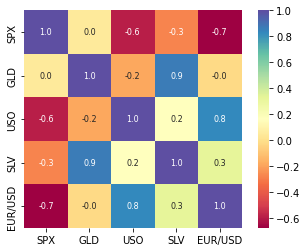

In [12]:
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True,annot_kws={'size':8}, cmap='Spectral');


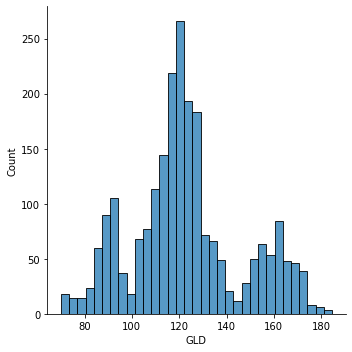

In [18]:
sns.displot(gold['GLD']);

In [13]:
x= gold.drop(['Date', 'GLD'], axis=1)
Y=gold['GLD']


In [14]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.15, random_state=1)

In [16]:
model= RandomForestRegressor(n_estimators = 100)


In [17]:
model.fit(x_train,Y_train)


RandomForestRegressor()

In [19]:
prediction = model.predict(x_test)

In [20]:
error =metrics.r2_score(Y_test, prediction)

In [21]:
print(error)

0.9882783409989927


In [22]:
Y_test = list(Y_test)


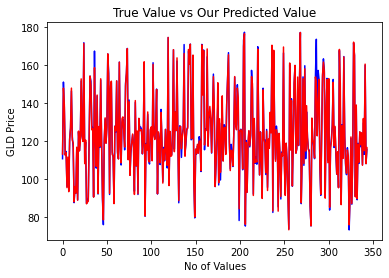

In [23]:
plt.plot(Y_test, color='blue', label = 'True Value')
plt.plot(prediction, color='red', label = 'Our predicted Value')
plt.title('True Value vs Our Predicted Value')
plt.xlabel('No of Values')
plt.ylabel('GLD Price')
plt.show()